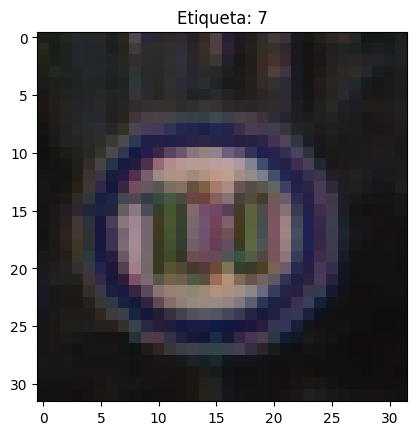

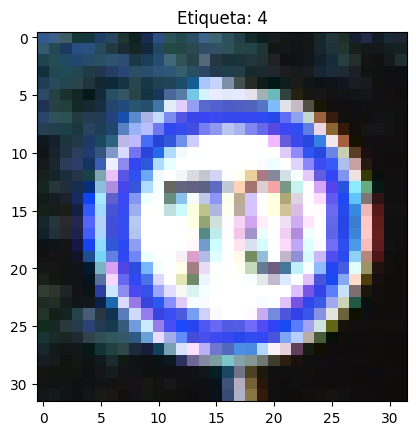

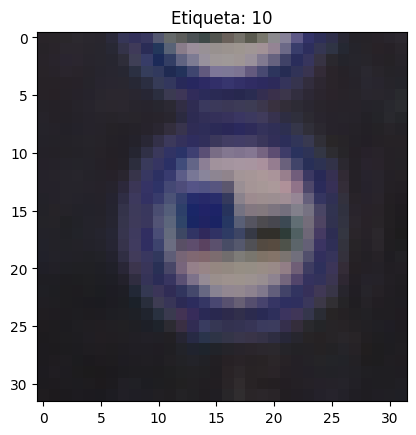

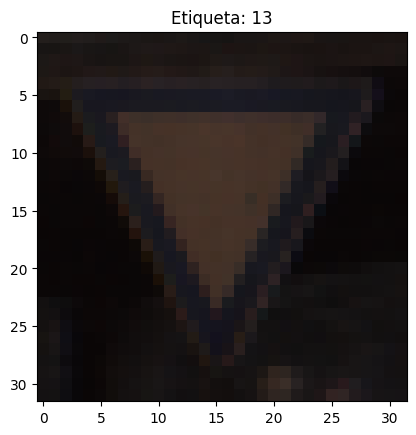

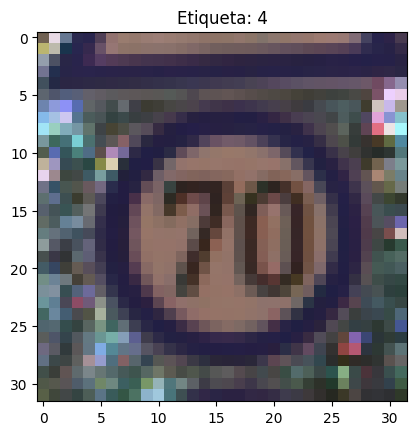

In [3]:
import numpy as np
import cv2
import os
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Directorio donde se encuentra el conjunto de datos
dataset_path = 'C:/Users/Rodrigo/Desktop/Train'

def load_data(dataset_path):
    images = []
    labels = []
    classes = os.listdir(dataset_path)
    
    for label in classes:
        if not label.isdigit(): continue  # Filtrar carpetas que no contienen imágenes
        class_path = os.path.join(dataset_path, label)
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            # Leer y redimensionar la imagen
            img = cv2.imread(image_path)
            img = cv2.resize(img, (32, 32))  # Redimensionar las imágenes a 32x32
            images.append(img)
            labels.append(int(label))

    images = np.array(images)
    labels = np.array(labels)
    
    # Normalizar las imágenes
    images = images / 255.0
    
    # Convertir las etiquetas a one-hot encoding
    labels = to_categorical(labels, num_classes=43)
    
    return images, labels

# Cargar los datos
X, y = load_data(dataset_path)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualizar algunas imágenes del dataset
for i in range(5):
    plt.imshow(X_train[i])
    plt.title(f"Etiqueta: {np.argmax(y_train[i])}")
    plt.show()

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Crear el modelo CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(128, activation='relu'),
    Dropout(0.5),
    
    Dense(43, activation='softmax')  # 43 clases de señales de tráfico
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\Rodrigo\Desktop\Proyectos\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.3325 - loss: 2.4795 - val_accuracy: 0.8973 - val_loss: 0.4189
Epoch 2/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.7897 - loss: 0.6615 - val_accuracy: 0.9524 - val_loss: 0.1918
Epoch 3/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8703 - loss: 0.4049 - val_accuracy: 0.9742 - val_loss: 0.1230
Epoch 4/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9011 - loss: 0.3116 - val_accuracy: 0.9770 - val_loss: 0.0877
Epoch 5/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9176 - loss: 0.2552 - val_accuracy: 0.9850 - val_loss: 0.0588
Epoch 6/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9355 - loss: 0.2078 - val_accuracy: 0.9866 - val_loss: 0.0535
Epoch 7/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9416 - loss: 0.1794 - val_accuracy: 0.9876 - val_loss: 0.0504
Epoch 8/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9478 - loss: 0.1556 - 

In [6]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_accuracy * 100:.2f}%")

246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9942 - loss: 0.0283
Precisión en el conjunto de prueba: 99.44%


In [7]:
# Guardar el modelo entrenado
model.save('traffic_sign_model.h5')

In [8]:
# Diccionario de clases para GTSRB, puedes ampliarlo según el conjunto de datos
class_names = {
    0: "Speed Limit (20km/h)",
    1: "Speed Limit (30km/h)",
    2: "Speed Limit (50km/h)",
    3: "Speed Limit (60km/h)",
    4: "Speed Limit (70km/h)",
    5: "Speed Limit (80km/h)",
    6: "End of Speed Limit (80km/h)",
    7: "Speed Limit (100km/h)",
    8: "Speed Limit (120km/h)",
    9: "No Passing",
    10: "No Passing for Vehicles Over 3.5 Tons",
    11: "Right-of-way at the Next Intersection",
    12: "Priority Road",
    13: "Yield",
    14: "Stop",
    15: "No Vehicles",
    16: "Vehicles Over 3.5 Tons Prohibited",
    17: "No Entry",
    18: "General Caution",
    19: "Dangerous Curve to the Left",
    20: "Dangerous Curve to the Right",
    21: "Double Curve",
    22: "Bumpy Road",
    23: "Slippery Road",
    24: "Road Narrows on the Right",
    25: "Road Work",
    26: "Traffic Signals",
    27: "Pedestrians",
    28: "Children Crossing",
    29: "Bicycles Crossing",
    30: "Beware of Ice/snow",
    31: "Wild Animals Crossing",
    32: "End of All Speed and Passing Limits",
    33: "Turn Right Ahead",
    34: "Turn Left Ahead",
    35: "Ahead Only",
    36: "Go Straight or Right",
    37: "Go Straight or Left",
    38: "Keep Right",
    39: "Keep Left",
    40: "Roundabout Mandatory",
    41: "End of Priority Road",
    42: "Emergency Vehicle",
}

# Función para cargar y preprocesar una nueva imagen
def preprocess_image(image_path):
    if not os.path.exists(image_path):
        print(f"Error: La imagen no existe en la ruta proporcionada: {image_path}")
        return None
    
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: No se pudo cargar la imagen desde la ruta: {image_path}")
        return None
    
    img = cv2.resize(img, (32, 32))  # Redimensionar la imagen a 32x32
    img = np.array(img) / 255.0  # Normalizar la imagen
    img = np.expand_dims(img, axis=0)  # Añadir una dimensión extra (batch size)
    return img

# Cargar una imagen de prueba y hacer la predicción
img_path = 'snow.webp'  # Cambia esto al path de la imagen de prueba
img = preprocess_image(img_path)

if img is not None:
    # Realizar la predicción
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)

    # Obtener el nombre de la clase correspondiente
    predicted_class_name = class_names.get(predicted_class, "Clase desconocida")

    print(f"La predicción de la clase es: {predicted_class_name}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
La predicción de la clase es: Beware of Ice/snow
